<a href="https://colab.research.google.com/github/jobende-OSU/CS4783-Notebooks/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please note that all blocks must be ran sequentially at least once for them to execute properly.

# Question 1.1

Relationship: y = 3.306566827494051 * x + 6.193214162526806
Training cost: 8466.736319868796
Training error: -0.0
Test set cost: 140.9923268888887
Test error: 0.1915515


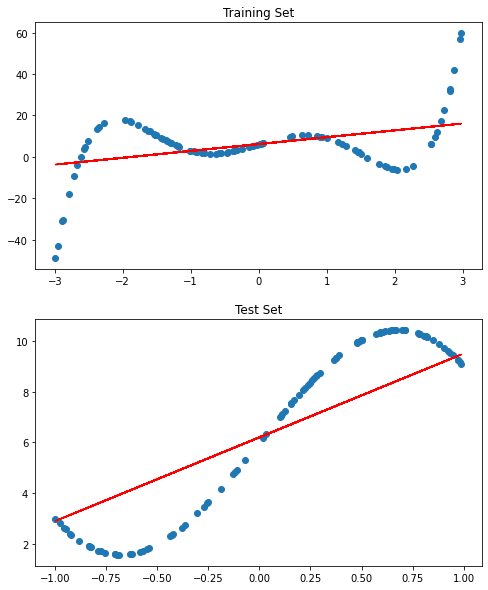

In [33]:
import numpy as np 
import matplotlib.pyplot as plt

# Import training and testing data
x_train = np.load("x_train.npy")
x_test = np.load("x_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# y_test was not formatted the same as y_train, so this fixes it.
y_test = [i for entry in y_test for i in entry] 

# Function used for learning using normal equations 
def learn(X, Y): # Equation taken directly from slides
  return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y)

# Cost function used to measure quality of predictions
def cost(X, Y, theta):
  X0y = X.dot(theta) - Y
  return 0.5 * X0y.T.dot(X0y)

# Scatter plot the training data
xData = [i for entry in x_train for i in entry]
fig, axs = plt.subplots(2, figsize = (8, 10))
axs[0].scatter(xData, y_train)

# Add a column of ones for the bias term.
x_trainBias = np.append(x_train, np.ones((len(x_train),1)), axis=1) 

# Learn a theta for the data
theta = learn(x_trainBias, y_train)

# Plot the prediction
yData =  x_trainBias.dot(theta)
axs[0].plot(xData, yData, 'r')

# Calculate the training error
train_error = np.sum(y_train - yData) / len(y_train)

# Scatter plot the test data
xData = [i for entry in x_test for i in entry]
axs[1].scatter(xData, y_test)

# Add a column of ones for the bias term.
x_testBias = np.append(x_test, np.ones((len(x_test), 1)), axis=1)

# Plot the prediction with the test data
yData = x_testBias.dot(theta)
axs[1].plot(xData, yData, 'r')

# Calculate the test error
test_error = np.sum(y_test - yData) / len(y_test)

# Configure the titles of the plots
axs[0].title.set_text('Training Set')
axs[1].title.set_text('Test Set')

# Print the results
print(f'Relationship: y = {theta[0]} * x + {theta[1]}')
print(f"Training cost: {cost(x_trainBias, y_train, theta)}")
print(f"Training error: {round(train_error, 8)}")
print(f"Test set cost: {cost(x_testBias, y_test, theta)}")
print(f"Test error: {round(test_error, 8)}")

The problem said to not use any prepackaged library, however I assumed it would be fine to use the matrix operations included with numpy, namely the inverse function, since numpy was required for loading the data anyways.

I went into this problem with the idea to use the normal equations method of solving linear regression, both since the data set is relatively small and because it would be easier to implement for me. I also used the pseudo-inverse function in my normal equation to avoid problems with non-invertible matrices.

I simply implemented the equation shown in the lecture slides for my learning function verbatum and used the cost function given earlier in that same lecture.

The equation modeling a linear relationship between x and y that I found was y = 3.306566827494051x + 6.193214162526806. It indicates an overall positive relationship between the two sets which can also be seen in the above figures.

# Question 1.2

a.
No, the data obviously has a non-linear relationship as shown by the graph. Additionally, the high cost and near-zero error of both data sets indicate a non-linear relationship.

b. Yes, it would be a good idea to add a polynomial basis function to better fit the data. This could be implemented by adding columns to the input containing the value of x^2, x^3, etc. As seen in the graphs below, a 5th order polynomial fits both the training set and the test set perfectly. The cost and error of both sets are also approximately zero when using this feature.

Relationship: y = 6.0 + 10.0 * x + 0.0 * x^2 + -8.0 * x^3 + -0.0 * x^4 + 1.0 * x^5
Training cost: 0.0
Training error: 0.0
Test set cost: 0.0
Test error: 0.0


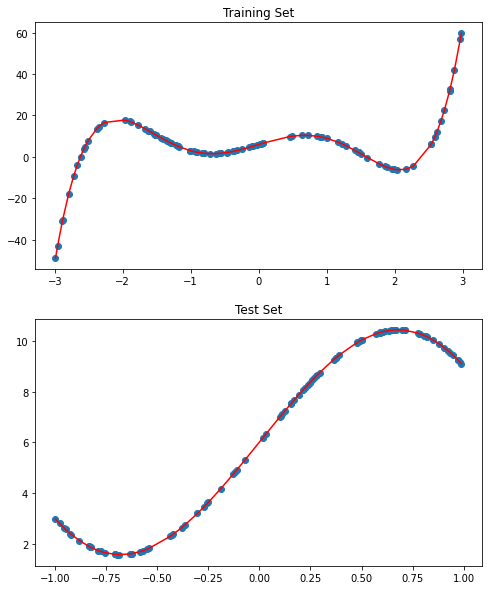

In [34]:
# Scatter plot the training data
xData = [i for entry in x_train for i in entry]
fig, axs = plt.subplots(2, figsize = (8, 10))
axs[0].scatter(xData, y_train)

# Sort the training data because apparently it wasn't already.
coords = [[x_train[i][0], y_train[i]] for i in range(len(x_train))]
coords = sorted(coords , key=lambda k: [k[0], k[1]])
X = [[x] for x in np.transpose(coords)[0]]

# Defines the order of the polynomial feature
order = 5

# Used to format the data to use a polynomial feature.
def formData(X, order):
  # Add the bias column
  X = np.hstack((np.ones((len(X), 1)), X))
  # Add any other higher order columns
  for i in range(2, order+1):
    X = np.hstack((X, (X[:, 1] ** i).reshape((len(X), 1))))
  return X

# Add the polynomial feature and learn phi.
x_trainData = formData(x_train, order)
phi = learn(x_trainData, y_train)

# Graph the resulting line for the training set.
yData =  formData(X, order).dot(phi)
axs[0].plot(X, yData, 'r')

# Calculate the training error
train_error = np.sum(y_train - yData) / len(y_train)

# Scatter plot the test data
xData = [i for entry in x_test for i in entry]
axs[1].scatter(xData, y_test)

# Sort the test data because apparently it wasn't already.
coords = [[x_test[i][0], y_test[i]] for i in range(len(x_test))]
coords = sorted(coords , key=lambda k: [k[0], k[1]])
X = [[x] for x in np.transpose(coords)[0]]

# Graph the resulting line for the test set
x_testData = formData(x_test, order)
yData = formData(X, order).dot(phi)
axs[1].plot(X, yData, 'r')

# Calculate the test error
test_error = np.sum(y_test - yData) / len(y_test)

# Configure the titles of the plots
axs[0].title.set_text('Training Set')
axs[1].title.set_text('Test Set')

# Print the results
print(f'Relationship: y = {round(phi[0], 5)} + {round(phi[1], 5)} * x ' + 
      f'+ {round(phi[2], 5)} * x^2 + {round(phi[3], 5)} * x^3 ' + 
      f'+ {round(phi[4], 5)} * x^4 + {round(phi[5], 5)} * x^5')
print(f"Training cost: {round(cost(x_trainData, y_train, phi), 5)}")
print(f"Training error: {round(train_error, 8)}")
print(f"Test set cost: {round(cost(x_testData, y_test, phi), 5)}")
print(f"Test error: {round(test_error, 8)}")

The code I wrote for implementing the polynomial feature was very simple. Adding more feature columns to the input that contained the values for x to the ith power was the only change required to implement it, which I made a function named formData.

To find the best fitting polynomial, I just used trial and error and increased the order I was using until it had both 0 error and cost for the training set and looked right in the above plots. After applying it to the test set and having the same outcome, I presumed it optimal.

# Question 2

1. The average least squares error using my model is approximately 0.02098052844539947.
2. The factor with the most effect on the final price is the living area because it has the highest absolute-valued coefficient of all the features. This feature cannot really be used for estimating the final price on its own since the error for each point individually is too significant as shown by the below graph.
3. The factor with the least effect on the final price is the age of the home because it has the smallest absolute-valued coefficient of all the features. Removing this feature notably improves the overall performance, lowering the cost to be effectively zero while the error also remains approximately 0.

Average Error: 0.02098053
Cost: 131.18215
Most Effect: Living area, (12.46564715111815)
Average Error (Most Effect): -0.0
Cost (Most Effect): 407.35318
Least Effect: Age of home, (0.05848318880906453)
Average Error (Least Effect): 0.0
Cost (Least Effect): 0.0


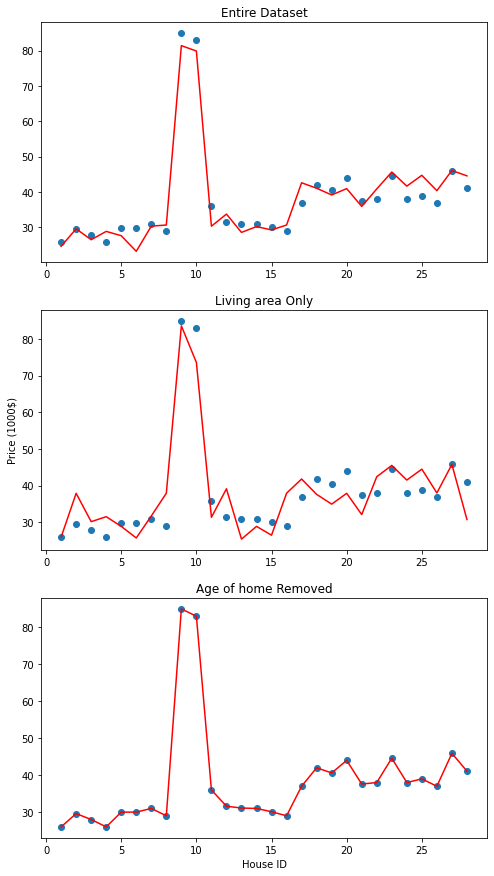

In [40]:
import pandas as pd

# Import the data and take note of the labels
data = pd.read_csv("Assignment1_Q2_Data.csv")
id = data['House ID']

# I'm assuming the ID of the house is intended to have no influence on price.
data = data.drop('House ID', axis=1)

# Assign columns to X and Y for data
X = data.drop('Price (1000$)', axis=1)
Y = data['Price (1000$)']

# Learn values for theta
theta = learn(X, Y)

# Setup and plot the prices and how well theta follows them.
fig, axs = plt.subplots(3, figsize = (8, 15))
axs[0].scatter(id, Y)
axs[0].plot(id, X.dot(theta), 'r')

# Calculate and display the average error and cost
error = np.sum(Y - X.dot(theta)) / len(Y)
print(f'Average Error: {round(error, 8)}')
print(f'Cost: {round(cost(X, Y, theta), 5)}')

# Attain the indices for the features with the most and least effect on price
labels = list(data.columns.values)
absTheta = np.array(list(map(abs, theta)))
thetaMax = absTheta.argmax()
thetaMin = absTheta.argmin()

# Calculate theta using only the most effective feature.
xMost = X[labels[thetaMax]]
xMost = np.array([[x, 1] for x in xMost])
thetaMost = learn(xMost, Y)

# Plot the prices and how well theta follows them.
axs[1].scatter(id, Y)
axs[1].plot(id, xMost.dot(thetaMost), 'r')

# Print the statistical results: label, error, and cost.
print(f'Most Effect: {labels[thetaMax]}, ({theta[thetaMax]})')
error = np.sum(Y - xMost.dot(thetaMost)) / len(Y)
print(f'Average Error (Most Effect): {round(error, 8)}')
print(f'Cost (Most Effect): {round(cost(xMost, Y, thetaMost), 5)}')

# Drop the least effective feature and relearn theta.
xLeast = data.drop(labels[thetaMin], axis=1)
thetaLeast = learn(xLeast, Y)

# Plot the prices and how well theta follows them.
axs[2].scatter(id, Y)
axs[2].plot(id, xLeast.dot(thetaLeast), 'r')

# Configure the titles of the plots
axs[0].title.set_text(f'Entire Dataset')
axs[1].title.set_text(f'{labels[thetaMax]} Only')
axs[2].title.set_text(f'{labels[thetaMin]} Removed')
axs[2].set_xlabel("House ID")
axs[1].set_ylabel("Price (1000$)")

# Print the statistical results: label, error, and cost.
print(f'Least Effect: {labels[thetaMin]}, ({absTheta[thetaMin]})')
error = np.sum(Y - xLeast.dot(thetaLeast)) / len(Y)
print(f'Average Error (Least Effect): {round(error, 8)}')
print(f'Cost (Least Effect): {round(cost(xLeast, Y, thetaLeast), 5)}')


Going into this problem, I determined that all the questions were relative to the entire set, so I didn't split it into a training and test set. I also removed the House ID column from the input features since I didn't think the problem intended for that to be used as a feature.

I implemented the LSE using the function given in lecture 3 of SUM(Y - h(x)). I also decided to graph the points using their ID as the X axis since it was a consistent datapoint between all three question parts.

My methodology for choosing the most and least effective features came down to what their coefficient was in the found relationship. I first sorted them by their absolute value. Then, I decided that the closest one to zero was the least impactful, and the one with the highest value was the most impactful.

# Question 3

1. I did not need any basis functions with this approach because it already fits the data very well as seen in both graphs.
2. The difference between this and the one for Q1 is that the training data is always reused for making new predictions, and that a new theta must be computed for each point we want to predict.

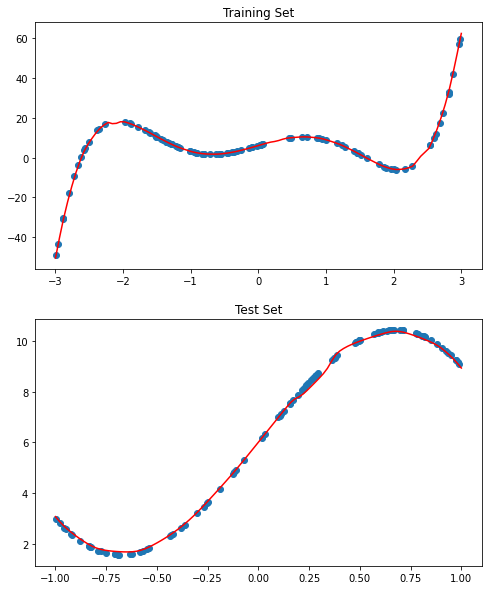

In [28]:
import math

# Function used for predicting a value using locally weighted normal expressions
def predict(point, X, Y, tau):
  # Add bias term to point of interest
  x = np.array([point, 1])
  # Compute the weight matrix
  W = np.eye(len(X))
  for j in range(len(X)):
      W[j,j] = np.exp(np.dot((X[j] - x), (X[j] - x).T) / (-2 * pow(tau, 2)))
  # Calculate theta for this point
  XtW = X.T.dot(W)
  theta = np.linalg.pinv(XtW.dot(X)).dot(XtW).dot(Y)
  # Return our prediction
  return x.dot(theta)

# Scatter plot the training data
xData = [i for entry in x_train for i in entry]
fig, axs = plt.subplots(2, figsize = (8, 10))
axs[0].scatter(xData, y_train)

# Add a column of ones for the bias term.
x_trainBias = np.append(x_train, np.ones((len(x_train),1)), axis=1) 

# Learn and plot predictions for the data
dMax = float(math.ceil(max(x_train)))
dMin = float(math.floor(min(x_train)))
dStep = abs(dMax - dMin) / len(x_train)
domain = np.arange(dMin, dMax + 0.001, dStep).tolist()
yData = [predict(point, x_trainBias, y_train, 0.075) for point in domain]
axs[0].plot(domain, yData, 'r')

# Scatter plot the test data
xData = [i for entry in x_test for i in entry]
axs[1].scatter(xData, y_test)

# Add a column of ones for the bias term.
x_testBias = np.append(x_test, np.ones((len(x_test), 1)), axis=1)

# Plot the prediction with the test data
dMax = float(math.ceil(max(x_test)))
dMin = float(math.floor(min(x_test)))
dStep = abs(dMax - dMin) / len(x_test)
domain = np.arange(dMin, dMax + 0.001, dStep).tolist()
yData = [predict(point, x_trainBias, y_train, 0.075) for point in domain]
axs[1].plot(domain, yData, 'r')

# Configure the titles of the plots
axs[0].title.set_text('Training Set')
axs[1].title.set_text('Test Set')

I originally attempted to just adapt my learn function from Q1 to step through a domain space and return an array of predictions to be graphed, but that ended up looking very clunky and convoluted.

So, I decided to just make a prediction function that could be used in list comprehensions instead. I also decided to computationally pick the domain range using floor and ceil for adaptability.

The weight matrix is calculated using the identity matrix for the training set, and is looped over for each item in the diagonal. I used the function given in the referenced slides for calculating w, though I had to replace the numerator term with an equivalent since python didn't want to work with matrix powers for me.

To find a good bandwidth to use, I just started at 0.5 and moved it in the direction that started to fit the data better. Although 0.05 fit the training set better, I eventually settled on 0.075 because it lessened some jerkiness I was seeing with the test set.